In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataset=pd.read_csv("Mall_Customers.csv")
dataset

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [3]:
X=dataset.iloc[:,[3,4]].values

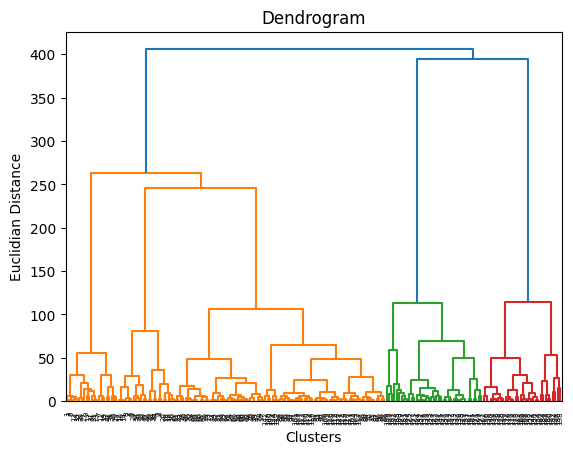

In [4]:
import scipy.cluster.hierarchy as sch
graph=sch.dendrogram(sch.linkage(X,method='ward'))
import matplotlib.pyplot as plt
plt.title("Dendrogram")
plt.xlabel("Clusters")
plt.ylabel("Euclidian Distance")
plt.show()

In [5]:
from sklearn.cluster import SpectralClustering
spectral=SpectralClustering(n_clusters=5,
                            eigen_solver='arpack',
                            assign_labels='cluster_qr',
                           random_state=55)
spectral_predict=spectral.fit_predict(X)
spectral_predict
# assign_labels{‘kmeans’, ‘discretize’, ‘cluster_qr’}, default=’kmeans’
# eigen_solver{‘arpack’, ‘lobpcg’, ‘amg’}, default=None

C:\Users\jayac\AppData\Local\anaconda3\envs\aiml\Lib\site-packages\sklearn\manifold\_spectral_embedding.py:392: UserWarning: Exited at iteration 2000 with accuracies 
[2.39476516e-14 9.64752502e-07 1.58544631e-06 1.46636281e-06
 1.22386201e-06 1.96087086e-05]
not reaching the requested tolerance 2.9802322387695312e-06.
Use iteration 1656 instead with accuracy 
1.4921186811605102e-06.

  _, diffusion_map = lobpcg(
C:\Users\jayac\AppData\Local\anaconda3\envs\aiml\Lib\site-packages\sklearn\manifold\_spectral_embedding.py:392: UserWarning: Exited postprocessing with accuracies 
[3.55998532e-15 4.89676557e-07 3.24533337e-07 6.51365199e-07
 6.20887974e-07 6.86624813e-06]
not reaching the requested tolerance 2.9802322387695312e-06.
  _, diffusion_map = lobpcg(


array([0, 2, 3, 2, 0, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 1, 2, 0, 2, 1, 3,
       0, 3, 3, 2, 0, 0, 0, 2, 0, 2, 0, 1, 3, 2, 3, 2, 0, 2, 2, 1, 2, 4,
       0, 4, 4, 4, 0, 0, 4, 4, 4, 4, 4, 0, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 2, 3, 4, 3, 2, 0, 4, 0, 4,
       3, 4, 0, 2, 0, 4, 0, 4, 0, 2, 3, 2, 0, 2, 3, 1, 1, 2, 1, 2, 1, 1,
       1, 2, 4, 1, 4, 1, 3, 2, 4, 2, 0, 0, 3, 0, 0, 1, 3, 0, 3, 0, 3, 0,
       3, 3, 3, 2, 0, 2, 3, 2, 0, 1, 2, 2, 3, 2, 2, 2, 0, 0, 0, 1, 2, 1,
       0, 0], dtype=int64)

In [6]:
supervised=pd.DataFrame(dataset)

In [7]:
supervised['cluster_group']=spectral_predict

In [8]:
supervised

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),cluster_group
0,1,Male,19,15,39,0
1,2,Male,21,15,81,2
2,3,Female,20,16,6,3
3,4,Female,23,16,77,2
4,5,Female,31,17,40,0
...,...,...,...,...,...,...
195,196,Female,35,120,79,1
196,197,Female,45,126,28,2
197,198,Male,32,126,74,1
198,199,Male,32,137,18,0


In [9]:
supervised.to_csv("spectral_cluster.csv",index=False)

In [10]:
supervised['cluster_group'].value_counts()

cluster_group
4    85
2    38
0    35
3    26
1    16
Name: count, dtype: int64

In [11]:
# centroids=spectral.cluster_centers_
# centroids

C:\Users\jayac\AppData\Local\anaconda3\envs\aiml\Lib\site-packages\seaborn\regression.py:582: UserWarning: legend_out is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)
C:\Users\jayac\AppData\Local\anaconda3\envs\aiml\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


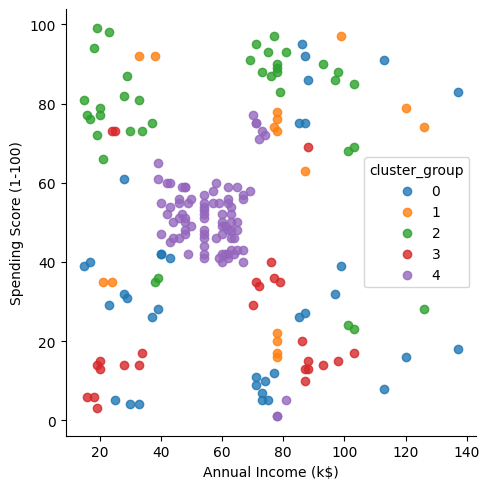

In [12]:
import seaborn as sns
graph=sns.lmplot(data=supervised,
                x=supervised.columns[3],
                y=supervised.columns[4],
                hue=supervised.columns[5],
                fit_reg=False,
                legend=True,
                legend_out=False)